In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [4]:
df = pd.read_csv(r"C:\Users\alokk\Desktop\csv\Food-Truck-LineReg.csv",names = ["xlabel","ylabel"])
df.head()

,xlabel,ylabel
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


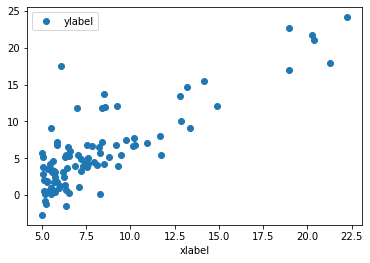

In [5]:
df.plot(x = "xlabel",y= "ylabel",style="o")
plt.show()

In [6]:
x_mean = df['xlabel'].mean()
y_mean = df['ylabel'].mean()
print(x_mean,y_mean)

8.159800000000002 5.83913505154639


In [7]:
df["x"] = df["xlabel"] - x_mean
df["y"] = df["ylabel"] - y_mean
df["x*y"] = df["x"]*df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2

In [8]:
df

,xlabel,ylabel,x,y,x*y,x^2,y^2
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581
...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431


In [9]:
sum_x_y = df["x*y"].sum()
sum_x_sq = df["x^2"].sum()
sum_y_sq = df["y^2"].sum()

In [10]:
correlation = (sum_x_y)/(sum_x_sq * sum_y_sq)**0.5
correlation

0.8378732325263409

In [11]:
std_x = statistics.stdev(df["xlabel"])
std_y = statistics.stdev(df["ylabel"])

In [12]:
m = correlation * (std_y/std_x)

In [13]:
c = y_mean - m*x_mean

In [14]:
df["y_pred"] = m*df["xlabel"] + c

In [15]:
df

,xlabel,ylabel,x,y,x*y,x^2,y^2,y_pred
0,6.1101,17.59200,-2.0497,11.752865,-24.089847,4.201270,138.129834,3.393774
1,5.5277,9.13020,-2.6321,3.291065,-8.662412,6.927950,10.831108,2.698951
2,8.5186,13.66200,0.3588,7.822865,2.806844,0.128737,61.197216,6.267196
3,7.0032,11.85400,-1.1566,6.014865,-6.956793,1.337724,36.178600,4.459272
4,5.8598,6.82330,-2.3000,0.984165,-2.263579,5.290000,0.968581,3.095158
...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,-3.121794,5.239979,1.859855,3.108162
93,5.3054,1.98690,-2.8544,-3.852235,10.995820,8.147599,14.839715,2.433740
94,8.2934,0.14454,0.1336,-5.694595,-0.760798,0.017849,32.428413,5.998524
95,13.3940,9.05510,5.2342,3.215965,16.833004,27.396850,10.342431,12.083712


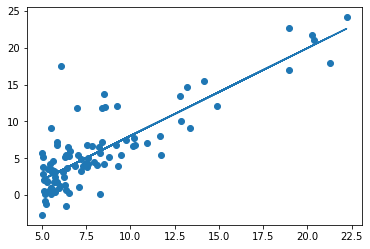

In [16]:
plot1 = plt.scatter(df['xlabel'],df['ylabel'])
plot2 = plt.plot(df['xlabel'],df["y_pred"])
plt.show()

In [17]:
ssr = sum((df["y_pred"] - y_mean)**2)
ssr

2046.3146047180403

In [18]:
sse = sum((df["y_pred"] - df["ylabel"])**2)
sse

868.5324469391843

In [21]:
tss_new = sse + ssr
tss_new


2914.8470516572247

In [23]:
r_sq = correlation**2
r_sq

0.7020315537841398

In [29]:
cost = sse/len(df)
cost

8.953942751950354